In [29]:
# importing plugins 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


In [30]:
# loading training dataset
data = pd.read_csv("fashion-mnist_train.csv")

In [31]:
# dataset display
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# dataset size according to rows and column
data.shape

(60000, 785)

In [33]:
# loading and displaying test dataset
data = pd.read_csv("fashion-mnist_test.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# loading training images, training labels, testing images and testing labels using tensorsflow
(image_train, label_train), (image_test, label_test) = fashion_mnist.load_data()

In [35]:
# size of traing images (pixels)
image_train.shape

(60000, 28, 28)

In [36]:
# size of testing images (pixels)
image_test.shape

(10000, 28, 28)

In [37]:
# size of traing label
label_train.shape

(60000,)

In [38]:
# size of testing label
label_test.shape

(10000,)

In [39]:
# displaying the first 10 labes from the dataset
label_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

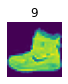

<Figure size 432x288 with 0 Axes>

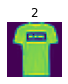

<Figure size 432x288 with 0 Axes>

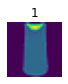

<Figure size 432x288 with 0 Axes>

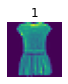

<Figure size 432x288 with 0 Axes>

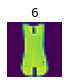

<Figure size 432x288 with 0 Axes>

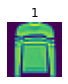

<Figure size 432x288 with 0 Axes>

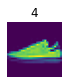

<Figure size 432x288 with 0 Axes>

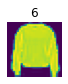

<Figure size 432x288 with 0 Axes>

In [40]:
# displaying the first 8 images and their labes from the dataset
for i in range(8):
    plt.figure(figsize=(1,1))
    plt.imshow(image_train[i])
    plt.title(format(label_test[i]))
    plt.axis("off")
    plt.figure()

<Figure size 432x288 with 0 Axes>

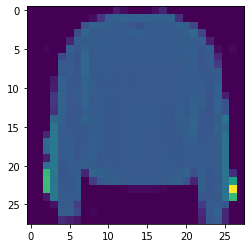

<Figure size 432x288 with 0 Axes>

In [41]:
# normalizing images and showing the normalized image
image_train = keras.utils.normalize(image_train, axis = 1)
image_test = keras.utils.normalize(image_test, axis = 1)
plt.imshow(image_train[7])
plt.figure()


In [42]:
# training model
model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(100, activation="elu"))
model.add(Dense(200, activation="elu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(image_train, label_train, epochs = 8)


Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6287 - accuracy: 0.7692
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8497
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3682 - accuracy: 0.8626
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8767
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8822
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2978 - accuracy: 0.8873
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.8953
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2672 - accuracy: 0.8982


In [43]:
model.evaluate(image_test, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8708


[0.3597574830055237, 0.8708000183105469]

In [44]:
# model prediction(testing)
prediction = model.predict(image_test[:8])


In [45]:
# predicting image labes
predict = np.argmax(prediction, axis = 1)
print(predict)
print(label_test[:8])

[9 2 1 1 0 1 4 6]
[9 2 1 1 6 1 4 6]


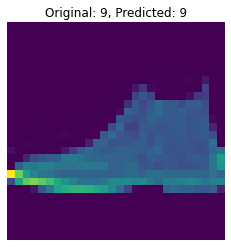

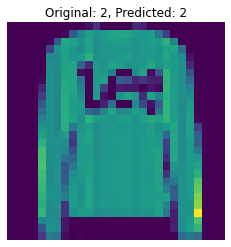

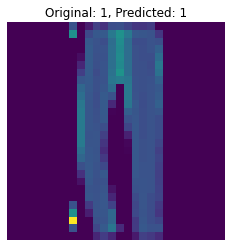

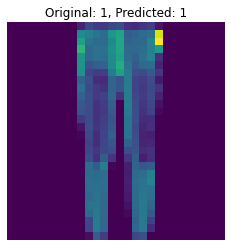

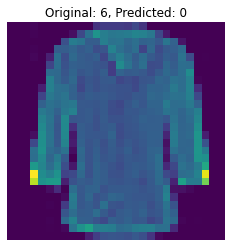

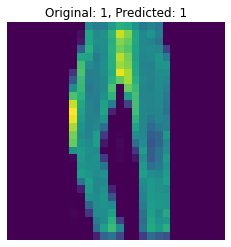

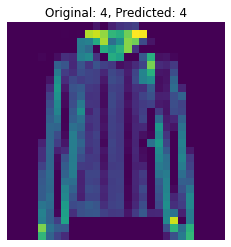

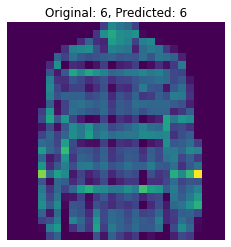

<Figure size 432x288 with 0 Axes>

In [46]:
# displaying predicted and original images
for i in range(8):
    plt.imshow(image_test[i])
    plt.title("Original: {}, Predicted: {}".format(label_test[i], predict[i]))
    plt.axis("off")
    plt.figure()

In [47]:
# performance matrices using accuracy
test_loss, test_accuracy = model.evaluate(image_test, label_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8708


In [48]:
# printing model loss and accuracy to determine model performance
print("Model loss:", test_loss*100,"Model Accuracy:", test_accuracy*100)

Model loss: 35.97574830055237 Model Accuracy: 87.08000183105469


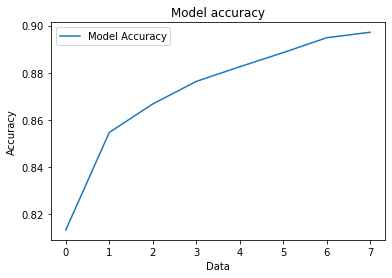

In [49]:
# Model Accuracy graph
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Data')
plt.legend(['Model Accuracy'])
plt.show()

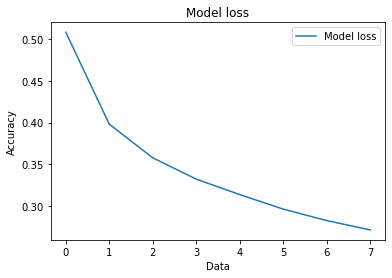

In [50]:
# Model Loss graph
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Data')
plt.legend(['Model loss'])
plt.show()